In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
import seaborn as sns


In [2]:
df_train = pd.read_csv("final_dataframe_train.csv")


<AxesSubplot:>

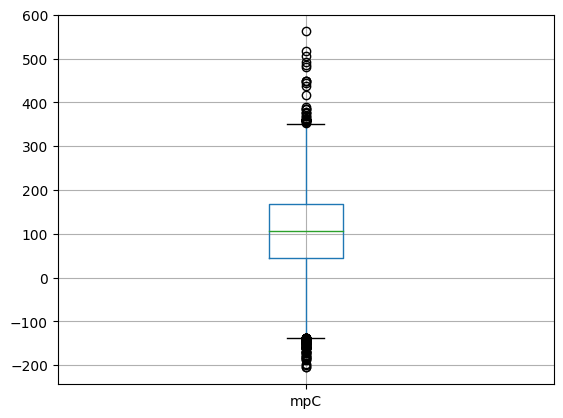

In [4]:
df_train[['mpC']].boxplot()


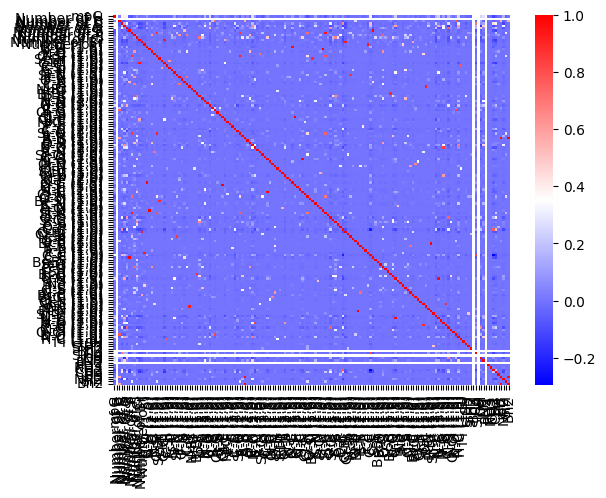

In [3]:
correlation_matrix = df_train.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


In [5]:
pd.set_option("display.max_column", None)
df_train.head(2)


,name,smiles,mpC,Number of B,Number of C,Number of N,Number of O,Number of F,Number of Si,Number of P,Number of S,Number of Cl,Number of Br,Number of I,I-O (1.0),C-S (2.0),O-S (1.0),Si-Br (1.0),N-P (2.0),S-N (1.5),N-I (1.0),C-Si (1.0),N-N (1.0),S-O (2.0),Cl-N (1.0),C-N (1.5),B-C (1.0),O-N (1.0),I-C (1.0),B-Br (1.0),N-S (1.0),N-H (1.0),Si-O (1.0),Si-P (1.0),S-I (1.0),S-P (2.0),N-Br (1.0),P-C (1.0),C-S (1.5),N-Cl (1.0),H-C (1.0),Br-Si (1.0),P-N (2.0),N-C (1.0),Cl-O (1.0),C-O (1.0),C-N (3.0),N-O (1.5),I-I (1.0),O-C (1.0),O-C (2.0),P-S (2.0),P-Cl (1.0),O-C (1.5),P-Br (1.0),N-N (2.0),Cl-Si (1.0),S-C (1.0),Cl-P (1.0),P-S (1.0),Cl-B (1.0),C-N (2.0),C-P (2.0),O-O (1.0),Br-Br (1.0),N-P (1.0),C-N (1.0),C-O (3.0),Cl-C (1.0),F-S (1.0),S-P (1.0),O-B (1.0),C-C (1.0),P-F (1.0),C-O (1.5),S-S (1.0),P-N (1.0),S-Cl (1.0),N-O (2.0),O-N (2.0),F-C (1.0),S-N (1.0),O-I (1.0),S-O (1.0),F-Si (1.0),S-Br (1.0),C-O (2.0),B-B (1.0),F-P (1.0),N-C (3.0),S-C (2.0),C-B (1.0),B-N (1.0),N-C (2.0),Br-C (1.0),F-B (1.0),B-F (1.0),S-F (1.0),N-O (1.0),Si-C (1.0),Si-Cl (1.0),O-P (1.0),C-H (1.0),N-N (3.0),B-S (1.0),N-C (1.5),H-N (1.0),C-S (1.0),Si-Si (1.0),S-C (1.5),Br-P (1.0),O-C (3.0),O-H (1.0),C-Cl (1.0),C-C (1.5),N-Si (1.0),P-O (2.0),N-B (1.0),H-O (1.0),P-O (1.0),Si-N (1.0),S-S (1.5),P-Si (1.0),C-F (1.0),O-S (2.0),C-C (3.0),N-N (1.5),Br-B (1.0),B-Cl (1.0),C-C (2.0),C-Br (1.0),O-Si (1.0),O-N (1.5),Si-F (1.0),N-S (1.5),B-O (1.0),O-Cl (1.0),O-P (2.0),Cl-S (1.0),C-I (1.0),C-P (1.0),OH,CH,CH2,NH2,SiH3,CH3,SiH,PH,Bh3,SiH4,SiH2,NH,Bh2,NH3,PH3,PH2,BH,SH,Molecular_weight,Aromatic Rings Count,Main Chain Length,Nombre d'éléments différents,Nombre de doubles liaisons,XLogP
0,3-i-pr-5-mephenyl-n-me carbamate,O=C(Oc1cc(C)cc(c1)C(C)C)NC,87.0,0,12,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,207.273,1,7,3,15,2.83662
1,b-2-furylacrylic acid,O=C(O)C=Cc1occc1,133.0,0,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138.122,1,7,2,10,1.37740


In [3]:
#Let's drop the NaN value
df_train.dropna(subset=["Molecular_weight"], inplace=True)

# Let's create the features:
X = df_train.drop(columns=["name", "smiles", "mpC"])
y = df_train["mpC"]


A- First model: Random forest with different estimators (see table)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Créez un modèle de forêt aléatoire avec les paramètres que vous souhaitez
model = RandomForestRegressor(n_estimators=300, random_state=42, min_samples_split=10, min_samples_leaf=4)

# Entraînez le modèle
model.fit(X, y)

# Calculez la RMSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5
mean_rmse_score = rmse_scores.mean()
print("Moyenne des scores RMSE :", mean_rmse_score)

# Calculez le R²
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_r2_score = r2_scores.mean()
print("Moyenne des scores R² :", mean_r2_score)


Moyenne des scores RMSE : 44.57009705727722
Moyenne des scores R² : 0.7649541881537617


B- Linear Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression Ridge
alpha = 0.1  # Paramètre de régularisation, à ajuster
model = Ridge(alpha=alpha)

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez la RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


RMSE: 56.86659969616075
R²: 0.6188504152236305


In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Supposons que vous avez déjà préparé vos données X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression Elastic Net
model = ElasticNet()

# Définissez les valeurs d'alpha et de l1_ratio à tester
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Créez l'objet GridSearchCV
scoring = {
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'R²': make_scorer(r2_score)
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring, refit='RMSE')

# Effectuez la recherche en grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Imprimez tous les résultats
results = grid_search.cv_results_
for mean_rmse, mean_r2, params in zip(results['mean_test_RMSE'], results['mean_test_R²'], results['params']):
    print("Hyperparamètres :", params)
    print("RMSE :", mean_rmse)
    print("R² :", mean_r2)
    print("-------")


/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.209e+06, tolerance: 1.077e+04
  model = cd_fast.enet_coordinate_descent(
/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.982e+06, tolerance: 1.055e+04
  model = cd_fast.enet_coordinate_descent(
/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the nu

Hyperparamètres : {'alpha': 0.1, 'l1_ratio': 0.1}
RMSE : 59.98366237427119
R² : 0.5734552465833422
-------
Hyperparamètres : {'alpha': 0.1, 'l1_ratio': 0.5}
RMSE : 59.741597540214116
R² : 0.5768639116357529
-------
Hyperparamètres : {'alpha': 0.1, 'l1_ratio': 0.9}
RMSE : 59.449601505446005
R² : 0.5809619143539978
-------
Hyperparamètres : {'alpha': 1.0, 'l1_ratio': 0.1}
RMSE : 63.61138437617408
R² : 0.5204900403891463
-------
Hyperparamètres : {'alpha': 1.0, 'l1_ratio': 0.5}
RMSE : 62.436843105025744
R² : 0.5379961701070297
-------
Hyperparamètres : {'alpha': 1.0, 'l1_ratio': 0.9}
RMSE : 60.810004357646335
R² : 0.5616560953250256
-------
Hyperparamètres : {'alpha': 10.0, 'l1_ratio': 0.1}
RMSE : 73.03849722205295
R² : 0.36802715283091086
-------
Hyperparamètres : {'alpha': 10.0, 'l1_ratio': 0.5}
RMSE : 72.2489899693455
R² : 0.38162341147704215
-------
Hyperparamètres : {'alpha': 10.0, 'l1_ratio': 0.9}
RMSE : 70.42500461924332
R² : 0.41243228879247196
-------


C- SVR

In [66]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous avez déjà préparé vos données X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression par vecteurs de support (SVR)
model = SVR(kernel='linear', C=10, epsilon=0.01)

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez la RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


RMSE: 57.78186449513638
R²: 0.6064825162009357


D- XGBoost

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous avez déjà préparé vos données X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle XGBoost pour la régression
model = xgb.XGBRegressor(learning_rate=0.2, n_estimators=500, max_depth=20)

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez la RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


RMSE: 45.89688099323898
R²: 0.7517168331319201


E- Light GMB

In [34]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b8/9d/1ce80cee7c5ef60f2fcc7e9fa97f29f7a8de3dc5a08922b3b2f1e9106481/lightgbm-4.1.0-py3-none-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous avez déjà préparé vos données X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle LightGBM pour la régression
model = lgb.LGBMRegressor(learning_rate=0.15, n_estimators=300, max_depth=15)

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez la RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 15781, number of used features: 91
[LightGBM] [Info] Start training from score 103.611473
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 42.129588239328385
R²: 0.7908030450598282


F- KNN

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous avez déjà préparé vos données X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle K-Nearest Neighbors pour la régression
model = KNeighborsRegressor(n_neighbors=10)  # Vous pouvez ajuster le nombre de voisins (n_neighbors)

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez la RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculez le R²
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


RMSE: 58.97369874749432
R²: 0.5900813633710495


G- Polynomial Regression

In [1]:
# Not working, too many columns


H- Bayesian regression

In [7]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score

# Liste des valeurs à tester pour les paramètres
n_iter_values = [100, 300, 500, 1000]
alpha_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

best_rmse = float('inf')
best_r2 = -float('inf')
best_params = {}

for n_iter in n_iter_values:
    for alpha_1 in alpha_values:
        for alpha_2 in alpha_values:
            bayesian_reg = BayesianRidge(n_iter=n_iter, alpha_1=alpha_1, alpha_2=alpha_2)
            rmse_scores = cross_val_score(bayesian_reg, X, y, cv=5, scoring='neg_mean_squared_error')
            r2_scores = cross_val_score(bayesian_reg, X, y, cv=5, scoring='r2')
            mean_rmse = np.sqrt(-rmse_scores.mean())
            mean_r2 = r2_scores.mean()
            if mean_rmse < best_rmse and mean_r2 > best_r2:
                best_rmse = mean_rmse
                best_r2 = mean_r2
                best_params = {'n_iter': n_iter, 'alpha_1': alpha_1, 'alpha_2': alpha_2}

print("Meilleurs paramètres:")
print(best_params)
print(f"Meilleur RMSE : {best_rmse}")
print(f"Meilleur R² : {best_r2}")


Meilleurs paramètres:
{'n_iter': 100, 'alpha_1': 0.01, 'alpha_2': 1e-06}
Meilleur RMSE : 58.675093368521445
Meilleur R² : 0.5927804642286609


I- SVR

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Liste des valeurs à tester pour les paramètres
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]  # Utilisé uniquement pour le noyau 'poly'

best_rmse = float('inf')
best_r2 = -float('inf')
best_params = {}

for kernel in kernels:
    for C in C_values:
        if kernel == 'poly':
            for degree in degrees:
                svm_reg = SVR(kernel=kernel, C=C, degree=degree)
                rmse_scores = cross_val_score(svm_reg, X, y, cv=5, scoring='neg_mean_squared_error')
                r2_scores = cross_val_score(svm_reg, X, y, cv=5, scoring='r2')
                mean_rmse = np.sqrt(-rmse_scores.mean())
                mean_r2 = r2_scores.mean()
                if mean_rmse < best_rmse and mean_r2 > best_r2:
                    best_rmse = mean_rmse
                    best_r2 = mean_r2
                    best_params = {'kernel': kernel, 'C': C, 'degree': degree}
        else:
            svm_reg = SVR(kernel=kernel, C=C)
            rmse_scores = cross_val_score(svm_reg, X, y, cv=5, scoring='neg_mean_squared_error')
            r2_scores = cross_val_score(svm_reg, X, y, cv=5, scoring='r2')
            mean_rmse = np.sqrt(-rmse_scores.mean())
            mean_r2 = r2_scores.mean()
            if mean_rmse < best_rmse and mean_r2 > best_r2:
                best_rmse = mean_rmse
                best_r2 = mean_r2
                best_params = {'kernel': kernel, 'C': C}

print("Meilleurs paramètres:")
print(best_params)
print(f"Meilleur RMSE : {best_rmse}")
print(f"Meilleur R² : {best_r2}")


In [ ]:
J- Deep learning - MLP


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle MLP
model_mlp = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Couche de sortie avec une seule unité pour la régression
])

# Choisissez la fonction de perte (loss) appropriée pour la régression
loss = 'mean_squared_error'  # Pour RMSE

# Choisissez un optimiseur (par exemple, Adam) et le taux d'apprentissage
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Compilez le modèle avec la fonction de perte et l'optimiseur
model_mlp.compile(loss=loss, optimizer=optimizer)

# Ajoutez l'arrêt anticipé (early stopping) avec une patience de 10 épisodes
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînez le modèle avec un nombre d'épochs et une taille de lot (batch size) appropriés
model_mlp.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Faites des prédictions sur l'ensemble de test
y_pred = model_mlp.predict(X_test)

# Calculez le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculez le R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")


2023-11-02 17:38:02.281075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 17:38:05.361576: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 17:38:05.499697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-02 17:38:05.499717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Epoch 1/1000
124/124 [==============================] - 1s 6ms/step - loss: 5557.3013 - val_loss: 3977.3921
Epoch 2/1000
124/124 [==============================] - 1s 5ms/step - loss: 3893.3125 - val_loss: 3825.8657
Epoch 3/1000
124/124 [==============================] - 0s 4ms/step - loss: 3499.2258 - val_loss: 5408.3691
Epoch 4/1000
124/124 [==============================] - 1s 4ms/step - loss: 3142.6538 - val_loss: 4313.1548
Epoch 5/1000
124/124 [==============================] - 1s 4ms/step - loss: 2897.3474 - val_loss: 2691.8359
Epoch 6/1000
124/124 [==============================] - 1s 5ms/step - loss: 2667.9041 - val_loss: 2547.7458
Epoch 7/1000
124/124 [==============================] - 1s 5ms/step - loss: 2544.4167 - val_loss: 2321.8391
Epoch 8/1000
124/124 [==============================] - 1s 5ms/step - loss: 2490.0679 - val_loss: 2284.2637
Epoch 9/1000
124/124 [==============================] - 1s 4ms/step - loss: 2425.8455 - val_loss: 2469.2405
Epoch 10/1000
124/124 [=====

K- Deep Learning CNN

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle CNN
model_cnn = keras.Sequential([
    keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Couche de sortie avec une seule unité pour la régression
])

# Choisissez la fonction de perte (loss) appropriée pour la régression
loss = 'mean_squared_error'  # Pour RMSE

# Choisissez un optimiseur (par exemple, Adam) et le taux d'apprentissage
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Compilez le modèle avec la fonction de perte et l'optimiseur
model_cnn.compile(loss=loss, optimizer=optimizer)

# Ajoutez l'arrêt anticipé (early stopping) avec une patience de 10 épisodes
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînez le modèle avec un nombre d'épochs et une taille de lot (batch size) appropriés
model_cnn.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Faites des prédictions sur l'ensemble de test
y_pred = model_cnn.predict(X_test)

# Calculez le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculez le R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")


Epoch 1/1000
124/124 [==============================] - 3s 19ms/step - loss: 5407.6177 - val_loss: 4037.4194
Epoch 2/1000
124/124 [==============================] - 2s 14ms/step - loss: 4346.3145 - val_loss: 4324.7563
Epoch 3/1000
124/124 [==============================] - 1s 12ms/step - loss: 3713.7703 - val_loss: 3163.8674
Epoch 4/1000
124/124 [==============================] - 1s 12ms/step - loss: 3154.1465 - val_loss: 2650.2913
Epoch 5/1000
124/124 [==============================] - 1s 11ms/step - loss: 2787.2268 - val_loss: 2505.8530
Epoch 6/1000
124/124 [==============================] - 2s 14ms/step - loss: 2630.8845 - val_loss: 2532.2539
Epoch 7/1000
124/124 [==============================] - 2s 14ms/step - loss: 2600.7505 - val_loss: 2471.7266
Epoch 8/1000
124/124 [==============================] - 2s 12ms/step - loss: 2540.7910 - val_loss: 2302.7490
Epoch 9/1000
124/124 [==============================] - 1s 12ms/step - loss: 2494.7927 - val_loss: 2437.8037
Epoch 10/1000
124/1

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import load_model


# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Faites des prédictions avec le modèle CNN
cnn_predictions = model_cnn.predict(X_test)

# Faites des prédictions avec le modèle MLP
mlp_predictions = model_mlp.predict(X_test)

# Combinez les prédictions en utilisant une moyenne pondérée
# Vous pouvez ajuster les poids en fonction de la performance de chaque modèle
ensemble_predictions = (0.7 * cnn_predictions + 0.3 * mlp_predictions)

# Calculez le RMSE
rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

# Calculez le R²
r2 = r2_score(y_test, ensemble_predictions)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")


124/124 [==============================] - 0s 2ms/step
RMSE : 44.32859923859875
R² : 0.7683944588035642


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import load_model

# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Faites des prédictions avec le modèle CNN
cnn_predictions = model_cnn.predict(X_test)

# Faites des prédictions avec le modèle MLP
mlp_predictions = model_mlp.predict(X_test)

# Essayez différentes pondérations de la moyenne pondérée
for weight in np.arange(0.1, 1.0, 0.1):
    ensemble_predictions = (weight * cnn_predictions + (1 - weight) * mlp_predictions)

    # Calculez le RMSE
    rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

    # Calculez le R²
    r2 = r2_score(y_test, ensemble_predictions)

    print(f"Weight: {weight:.1f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


124/124 [==============================] - 0s 2ms/step
Weight: 0.1, RMSE: 43.7853, R²: 0.7740
Weight: 0.2, RMSE: 43.6855, R²: 0.7751
Weight: 0.3, RMSE: 43.6620, R²: 0.7753
Weight: 0.4, RMSE: 43.7150, R²: 0.7748
Weight: 0.5, RMSE: 43.8443, R²: 0.7734
Weight: 0.6, RMSE: 44.0492, R²: 0.7713
Weight: 0.7, RMSE: 44.3286, R²: 0.7684
Weight: 0.8, RMSE: 44.6811, R²: 0.7647
Weight: 0.9, RMSE: 45.1051, R²: 0.7602
